In [15]:
print("Loading vix_utils into a jupyter notebook, and plotting some term structures")

Loading vix_utils into a jupyter notebook, and plotting some term structures


In [37]:
import vix_utils, pandas as pd, logging, asyncio,sys,matplotlib.pyplot as plt, scipy.stats as bc
from itertools import chain

In [17]:
#in Jupyter, use the vix_utils asynchronous functions to the load the data
#here we read the futures and cash term structure

vix_futures,vix_cash=await asyncio.gather(vix_utils.async_load_vix_term_structure(),vix_utils.async_get_vix_index_histories())


In [18]:
#another way, reading the futures, then the cash structure, in sequence instead of concurrently
vix_futures_skinny_2 = await vix_utils.async_load_vix_term_structure()
vix_cash_2=await vix_utils.async_get_vix_index_histories()

In [65]:
#manipulate the data to get what we want to display
vix_cash_wide=vix_utils.pivot_cash_term_structure_on_symbol(vix_cash)
vix_futures_monthly_skinny=vix_utils.select_monthly_futures(vix_futures)
vix_futures_wide=vix_utils.pivot_futures_on_monthly_tenor(vix_futures_monthly_skinny)
vix_futures_wide=vix_utils.append_continuous_maturity_one_month(vix_futures_wide)
selected_tenors=[1,1.5,2,3,4,5,6]
original_vix_futures_wide=pd.DataFrame(vix_futures_wide)
vix_futures_wide=vix_futures_wide[selected_tenors]
vix_futures_wide




******************************Duplicates detected for Trade Date and Tenor



1.0                                                          \
            Change  Close     Expiry                           File   High   
Trade Date                                                                   
2004-03-26     NaN    NaN        NaT                            NaN    NaN   
2004-03-29     NaN    NaN        NaT                            NaN    NaN   
2004-03-30     NaN    NaN        NaT                            NaN    NaN   
2004-03-31     NaN    NaN        NaT                            NaN    NaN   
2004-04-01     NaN    NaN        NaT                            NaN    NaN   
...            ...    ...        ...                            ...    ...   
2023-07-10 -0.0872  15.76 2023-07-19  2023-07-19.w_.CFE_VX_2023.csv  16.40   
2023-07-11 -0.2222  15.45 2023-07-19  2023-07-19.w_.CFE_VX_2023.csv  15.83   
2023-07-12 -1.2591  14.31 2023-07-19  2023-07-19.w_.CFE_VX_2023.csv  15.70   
2023-07-13 -0.1011  14.19 2023-07-19  2023-07-19.w_.CFE_VX_2023.csv  14.31   
2023-07-14 -0.3875  13.77 2023-07-19  2023-07-19.w_.CFE_VX_2023.csv  14.40   

                                                   1.5  ...        5.0  \
              Low   Open   Settle Tenor_Days    Change  ... Tenor_Days   
Trade Date                                              ...              
2004-03-26    NaN    NaN      NaN        NaN       NaN  ...      143.0   
2004-03-29    NaN    NaN      NaN        NaN       NaN  ...      140.0   
2004-03-30    NaN    NaN      NaN        NaN       NaN  ...      139.0   
2004-03-31    NaN    NaN      NaN        NaN       NaN  ...      138.0   
2004-04-01    NaN    NaN      NaN        NaN       NaN  ...      137.0   
...           ...    ...      ...        ...       ...  ...        ...   
2023-07-10  15.60  15.90  15.7747        9.0 -0.114370  ...      128.0   
2023-07-11  15.20  15.77  15.5525        8.0 -0.152690  ...      127.0   
2023-07-12  14.25  15.41  14.2934        7.0 -0.921600  ...      126.0   
2023-07-13  13.90  14.30  14.1923        6.0  0.115460  ...      125.0   
2023-07-14  13.75  14.19  13.8048        5.0 -0.214355  ...      124.0   

               6.0                                                          \
            Change  Close     Expiry                           File   High   
Trade Date                                                                   
2004-03-26     NaN    NaN        NaT                            NaN    NaN   
2004-03-29     NaN    NaN        NaT                            NaN    NaN   
2004-03-30     NaN    NaN        NaT                            NaN    NaN   
2004-03-31     NaN    NaN        NaT                            NaN    NaN   
2004-04-01     NaN    NaN        NaT                            NaN    NaN   
...            ...    ...        ...                            ...    ...   
2023-07-10 -0.3097  19.10 2023-12-20  2023-12-20.w_.CFE_VX_2023.csv  19.45   
2023-07-11 -0.1150  18.75 2023-12-20  2023-12-20.w_.CFE_VX_2023.csv  19.07   
2023-07-12 -0.3904  18.38 2023-12-20  2023-12-20.w_.CFE_VX_2023.csv  18.85   
2023-07-13  0.0107  18.42 2023-12-20  2023-12-20.w_.CFE_VX_2023.csv  18.45   
2023-07-14 -0.1114  18.32 2023-12-20  2023-12-20.w_.CFE_VX_2023.csv  18.57   

                                              
              Low   Open   Settle Tenor_Days  
Trade Date                                    
2004-03-26    NaN    NaN      NaN        NaN  
2004-03-29    NaN    NaN      NaN        NaN  
2004-03-30    NaN    NaN      NaN        NaN  
2004-03-31    NaN    NaN      NaN        NaN  
2004-04-01    NaN    NaN      NaN        NaN  
...           ...    ...      ...        ...  
2023-07-10  18.90  19.25  18.9447      163.0  
2023-07-11  18.70  19.05  18.8297      162.0  
2023-07-12  18.28  18.80  18.4393      161.0  
2023-07-13  18.12  18.35  18.4500      160.0  
2023-07-14  18.21  18.43  18.3386      159.0  

[4849 rows x 63 columns]

In [21]:

vix_futures_wide=vix_utils.append_continuous_maturity_one_month(vix_futures_wide)
vix_futures_wide
close=vix_futures_wide.swaplevel(0,1,axis=1)[["Close"]]

In [66]:
close=vix_futures_wide.swaplevel(axis=1)["Close"]
close

,1.0,1.5,2.0,3.0,4.0,5.0,6.0
Trade Date,,,,,,,
2004-03-26,NaN,NaN,20.27,20.20,NaN,20.06,NaN
2004-03-29,NaN,NaN,19.77,19.76,NaN,19.76,NaN
2004-03-30,NaN,NaN,19.61,19.73,NaN,19.92,NaN
2004-03-31,NaN,NaN,19.72,19.90,NaN,20.18,NaN
2004-04-01,NaN,NaN,19.65,19.94,NaN,20.28,NaN
...,...,...,...,...,...,...,...
2023-07-10,15.76,16.4035,16.75,17.75,18.37,18.85,19.10
2023-07-11,15.45,16.2200,16.55,17.62,18.22,18.60,18.75
2023-07-12,14.31,15.4125,15.78,17.08,17.77,18.15,18.38


<Axes: xlabel='Trade Date'>

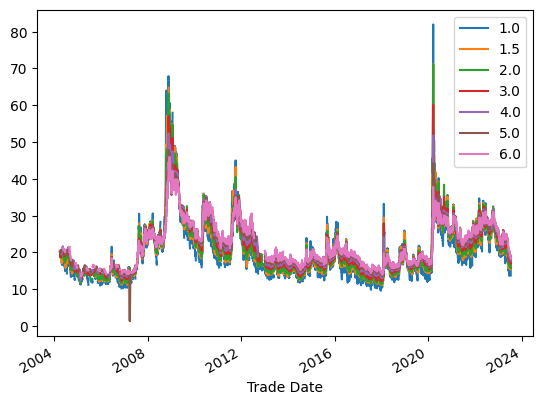

In [44]:
#plot futures
close.plot()

In [45]:
vix_cash_wide

Close                                                         \
Symbol        GVZ  LONGVOL    OVX   SHORTVOL    VIX  VIX3M  VIX6M  VIX9D   
Trade Date                                                                 
1990-01-02    NaN      NaN    NaN        NaN  17.24    NaN    NaN    NaN   
1990-01-03    NaN      NaN    NaN        NaN  18.19    NaN    NaN    NaN   
1990-01-04    NaN      NaN    NaN        NaN  19.22    NaN    NaN    NaN   
1990-01-05    NaN      NaN    NaN        NaN  20.11    NaN    NaN    NaN   
1990-01-08    NaN      NaN    NaN        NaN  20.26    NaN    NaN    NaN   
...           ...      ...    ...        ...    ...    ...    ...    ...   
2023-07-10  12.41  28.7226  38.35  1653.1131  15.07  17.25  19.21  13.50   
2023-07-11  12.64  28.4225  32.43  1670.3871  14.84  16.97  18.97  13.70   
2023-07-12  13.12  26.8397  32.69  1763.4051  13.54  16.11  18.26  11.38   
2023-07-13  12.73  26.9146  30.04  1758.4864  13.61  16.12  18.24  12.13   
2023-07-14  12.05      NaN  30.00        NaN  13.34  16.04  18.21  11.90   

                          ... Low                                            \
Symbol       VVIX  VXTLT  ... GVZ LONGVOL OVX SHORTVOL    VIX  VIX3M  VIX6M   
Trade Date                ...                                                 
1990-01-02    NaN    NaN  ... NaN     NaN NaN      NaN  17.24    NaN    NaN   
1990-01-03    NaN    NaN  ... NaN     NaN NaN      NaN  18.19    NaN    NaN   
1990-01-04    NaN    NaN  ... NaN     NaN NaN      NaN  19.22    NaN    NaN   
1990-01-05    NaN    NaN  ... NaN     NaN NaN      NaN  20.11    NaN    NaN   
1990-01-08    NaN    NaN  ... NaN     NaN NaN      NaN  20.26    NaN    NaN   
...           ...    ...  ...  ..     ...  ..      ...    ...    ...    ...   
2023-07-10  95.33  17.04  ... NaN     NaN NaN      NaN  15.04  17.20  19.14   
2023-07-11  95.21  16.55  ... NaN     NaN NaN      NaN  14.63  16.86  18.91   
2023-07-12  95.85  15.47  ... NaN     NaN NaN      NaN  13.51  16.05  18.17   
2023-07-13  96.43  15.12  ... NaN     NaN NaN      NaN  13.12  15.77  17.97   
2023-07-14  94.89  14.67  ... NaN     NaN NaN      NaN  13.22  16.00  18.17   

                              
Symbol      VIX9D VVIX VXTLT  
Trade Date                    
1990-01-02    NaN  NaN   NaN  
1990-01-03    NaN  NaN   NaN  
1990-01-04    NaN  NaN   NaN  
1990-01-05    NaN  NaN   NaN  
1990-01-08    NaN  NaN   NaN  
...           ...  ...   ...  
2023-07-10  13.45  NaN   NaN  
2023-07-11  13.29  NaN   NaN  
2023-07-12  11.30  NaN   NaN  
2023-07-13  11.47  NaN   NaN  
2023-07-14  11.57  NaN   NaN  

[8460 rows x 40 columns]

<Axes: xlabel='Trade Date'>

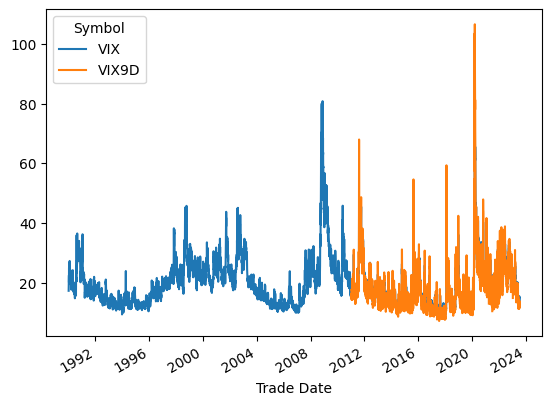

In [46]:
vix_cash_wide["Close"][["VIX","VIX9D"]].plot()

<Axes: xlabel='Trade Date'>

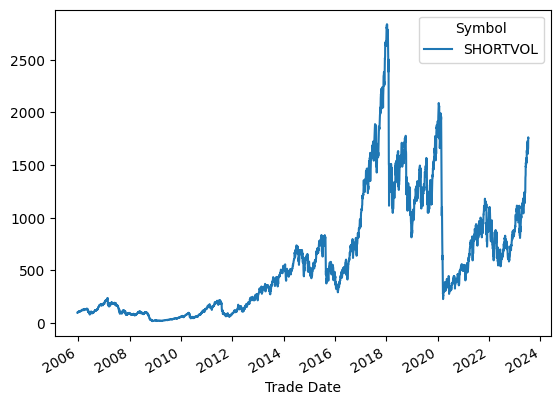

In [47]:
vix_cash_wide["Close"][["SHORTVOL"]].plot()

In [49]:
def add_column_level(df:pd.DataFrame,var_name):
        df2=pd.DataFrame(df)
        idx=df2.columns.to_frame()
        idx.insert(0,"Variable",var_name)
        df2.columns=pd.MultiIndex.from_frame(idx)
        return df2 


Compute the basis (future price - spot price) for the varous tenors and  VIX indexes. It is really only correct
to compare the VIX index since the futures are trading on the VIX, not VIX9D etc. 

In [50]:
vix_cash_history_closes=vix_cash_wide['Close']    
vix_basis_by_index=[add_column_level(close.sub(vix_cash_history_closes[spot_symbol],axis=0),spot_symbol+"_Basis") for spot_symbol in ["VIX9D","VIX","VIX3M","GVZ"]]

closes=add_column_level(close,"Futures")
vix_basis=pd.concat(chain([closes],vix_basis_by_index),axis=1,join="inner")
vix_basis 


Variable   Futures                                             VIX9D_Basis  \
0              1.0      1.5    2.0    3.0    4.0    5.0    6.0         1.0   
Trade Date                                                                   
2004-03-26     NaN      NaN  20.27  20.20    NaN  20.06    NaN         NaN   
2004-03-29     NaN      NaN  19.77  19.76    NaN  19.76    NaN         NaN   
2004-03-30     NaN      NaN  19.61  19.73    NaN  19.92    NaN         NaN   
2004-03-31     NaN      NaN  19.72  19.90    NaN  20.18    NaN         NaN   
2004-04-01     NaN      NaN  19.65  19.94    NaN  20.28    NaN         NaN   
...            ...      ...    ...    ...    ...    ...    ...         ...   
2023-07-10   15.76  16.4035  16.75  17.75  18.37  18.85  19.10        2.26   
2023-07-11   15.45  16.2200  16.55  17.62  18.22  18.60  18.75        1.75   
2023-07-12   14.31  15.4125  15.78  17.08  17.77  18.15  18.38        2.93   
2023-07-13   14.19  15.5660  15.91  17.12  17.75  18.17  18.42        2.06   
2023-07-14   13.77  15.4530  15.75  17.05  17.67  18.08  18.32        1.87   

Variable                  ... VIX3M_Basis             GVZ_Basis                \
0              1.5   2.0  ...         4.0   5.0   6.0       1.0     1.5   2.0   
Trade Date                ...                                                   
2004-03-26     NaN   NaN  ...         NaN   NaN   NaN       NaN     NaN   NaN   
2004-03-29     NaN   NaN  ...         NaN   NaN   NaN       NaN     NaN   NaN   
2004-03-30     NaN   NaN  ...         NaN   NaN   NaN       NaN     NaN   NaN   
2004-03-31     NaN   NaN  ...         NaN   NaN   NaN       NaN     NaN   NaN   
2004-04-01     NaN   NaN  ...         NaN   NaN   NaN       NaN     NaN   NaN   
...            ...   ...  ...         ...   ...   ...       ...     ...   ...   
2023-07-10  2.9035  3.25  ...        1.12  1.60  1.85      3.35  3.9935  4.34   
2023-07-11  2.5200  2.85  ...        1.25  1.63  1.78      2.81  3.5800  3.91   
2023-07-12  4.0325  4.40  ...        1.66  2.04  2.27      1.19  2.2925  2.66   
2023-07-13  3.4360  3.78  ...        1.63  2.05  2.30      1.46  2.8360  3.18   
2023-07-14  3.5530  3.85  ...        1.63  2.04  2.28      1.72  3.4030  3.70   

Variable                            
0            3.0   4.0   5.0   6.0  
Trade Date                          
2004-03-26   NaN   NaN   NaN   NaN  
2004-03-29   NaN   NaN   NaN   NaN  
2004-03-30   NaN   NaN   NaN   NaN  
2004-03-31   NaN   NaN   NaN   NaN  
2004-04-01   NaN   NaN   NaN   NaN  
...          ...   ...   ...   ...  
2023-07-10  5.34  5.96  6.44  6.69  
2023-07-11  4.98  5.58  5.96  6.11  
2023-07-12  3.96  4.65  5.03  5.26  
2023-07-13  4.39  5.02  5.44  5.69  
2023-07-14  5.00  5.62  6.03  6.27  

[4849 rows x 35 columns]

In [54]:
day_of_interest='2023-07-14'
di_cash=vix_cash_history_closes.loc[day_of_interest]
di_cash


Symbol
GVZ         12.05
LONGVOL       NaN
OVX         30.00
SHORTVOL      NaN
VIX         13.34
VIX3M       16.04
VIX6M       18.21
VIX9D       11.90
VVIX        94.89
VXTLT       14.67
Name: 2023-07-14 00:00:00, dtype: float64

In [55]:
di_futures=close.loc[day_of_interest]
di_futures

1.0    13.770
1.5    15.453
2.0    15.750
3.0    17.050
4.0    17.670
5.0    18.080
6.0    18.320
Name: 2023-07-14 00:00:00, dtype: float64

In [64]:
di_basis=vix_basis.loc[day_of_interest]
di_basis["VIX_Basis"]

0
1.0    0.430
1.5    2.113
2.0    2.410
3.0    3.710
4.0    4.330
5.0    4.740
6.0    4.980
Name: 2023-07-14 00:00:00, dtype: float64